##  Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.



In [1]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso,RidgeCV, LassoCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
print (sklearn.__version__)

0.23.0


In [3]:
# Function to calculate adjusted R-Squared
def adj_r2(x,y,r2):
    
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [4]:

boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
bos.columns = boston.feature_names

In [6]:
bos['RAD'].value_counts()
np.mean(bos['RAD'])

9.549407114624506

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
boston.target.shape

(506,)

In [9]:
bos.shape

(506, 13)

In [10]:
bos['PRICE'] = boston.target


In [11]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
# there seems to be no null values and there are no categorical variables
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [15]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

CRIM


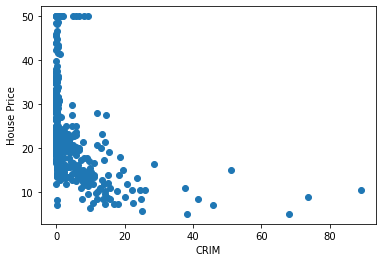

ZN


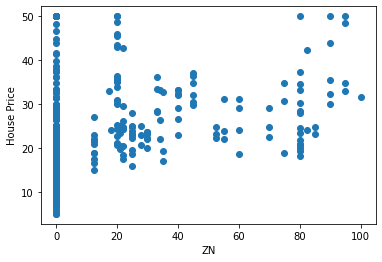

INDUS


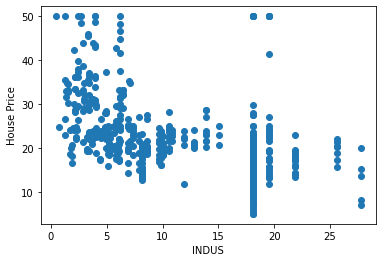

CHAS


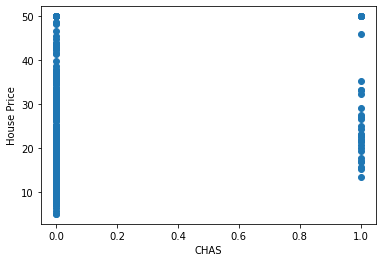

NOX


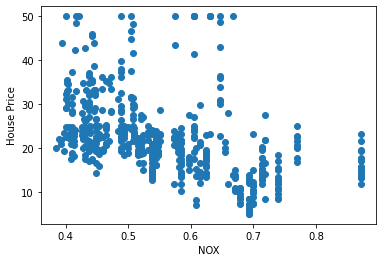

RM


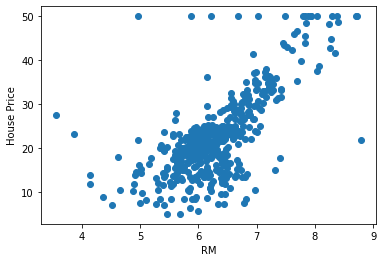

AGE


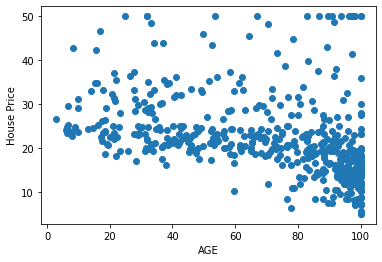

DIS


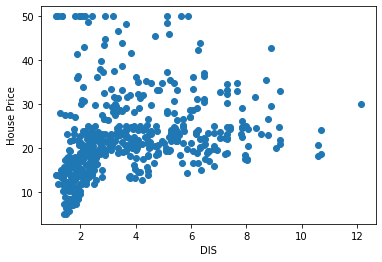

RAD


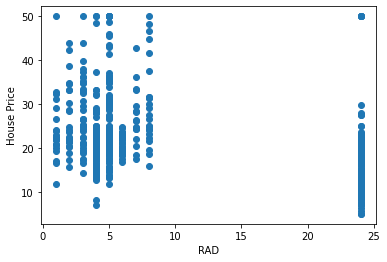

TAX


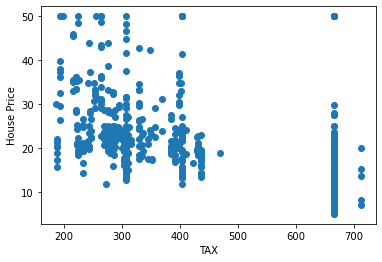

PTRATIO


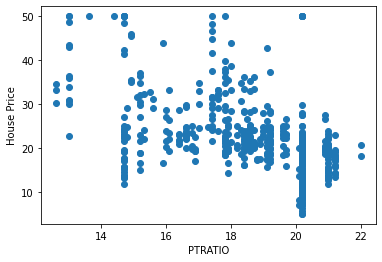

B


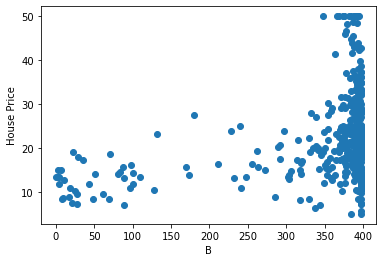

LSTAT


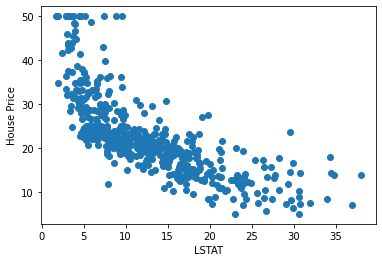

PRICE


In [16]:
#Lets visualise
for col in bos.columns:
    print(col)
    if (col != 'PRICE'):
        plt.scatter(bos[col],bos['PRICE'])
        plt.xlabel(col)
        plt.ylabel("House Price")
        plt.show()

The relationship between RM and houseprice is positive linear relationship. 

RM = average number of rooms per dwelling
    
The increase in the number of rooms increases the houseprice. There are certain outliers in the data.

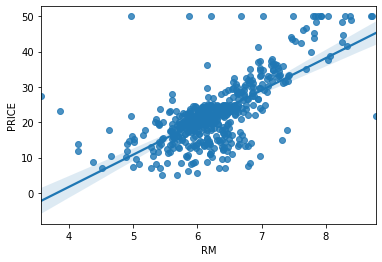

In [17]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

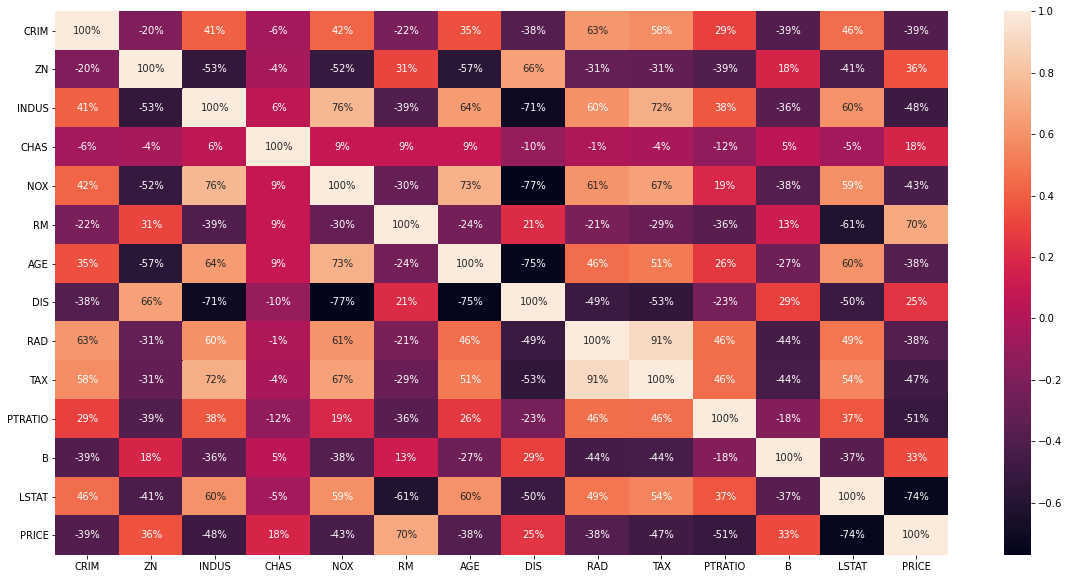

In [18]:
# we will use the variable 'RM' as the predictor of the price
plt.figure(figsize=(20,10))
sns.heatmap(bos.corr(),annot=True,fmt= '.0%')

so here we confirm that RM is the only variable which shows strong positive linear relationship

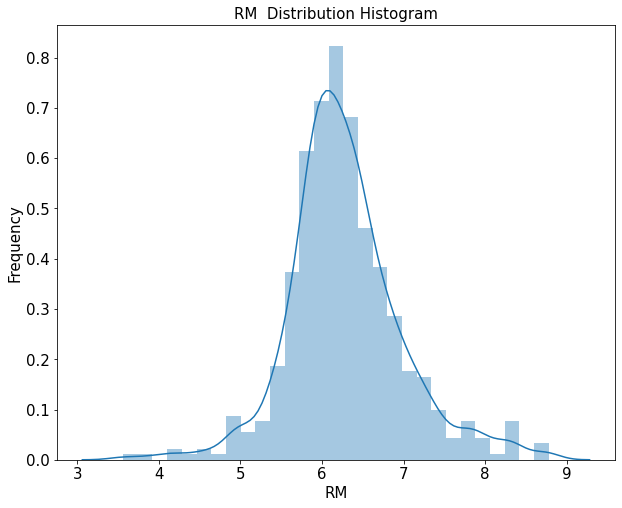

In [19]:

# Lets check the distribution of RM

plt.figure(figsize=[10,8])

plt.xlabel('Room size',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('RM  Distribution Histogram',fontsize=15)
sns.distplot(bos['RM'])
plt.show()

### Simple Linear Regression
### Using single predictor 'RM' 
### fitting linear regression using statsmodel

### Hypothesis Testing and p-values

Hypothesis testing is Closely related to confidence intervals. 

We start with a null hypothesis and an alternate hypothesis (that is opposite to the null). 

Then, we check whether the data rejects the null hypothesis or fails to reject the null hypothesis.



The conventional hypothesis test is as follows:

Null hypothesis: No relationship exists between RM and PRICE

Alternative hypothesis: There exists a relationship between  RM and PRICE 

How do we test this? 

We reject the null hypothesis (and thus believe the alternative hypothesis) if the 95% confidence interval does not include zero. 

The p-value represents the probability of the coefficient actually being zero.


In [20]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
x = bos['RM']
y = bos['PRICE']


In [22]:
#Fitting linear regression using statsmodel

import statsmodels.api as smf

x = smf.add_constant(x) # adding a constant
lmols = smf.OLS(y,x).fit()
lmols.summary()
single_r2_score = round((lmols.rsquared*100),2)
print("Single Linear model accuaracy", single_r2_score)

Single Linear model accuaracy 48.35



### Conclusion: we reject null hypothesis.
### There exists relationship between RM and PRICE

There is a ton of information in this output. 

But we'll concentrate on the coefficient table (middle table). 

We can interpret the RM coefficient (9.1021) by first noticing that the p-value (under P>|t|) is so small, basically zero. 
This means that the number of rooms, RM, is a statisticall significant predictor of PRICE. 

The regression coefficient for RM of 9.1021 means that on average, each additional room is associated with an increase of 9100 in house price net of the other variables. 

The confidence interval gives us a range of plausible values for this average change, about ( 8279,9925 ).

In [23]:

y_pred=lmols.predict(x)[0:5]
y_pred

0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
dtype: float64

In [24]:
y[0:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

### Fitting Linear Regression using sklearn for all 13 predictors

In [25]:
# check if all the features are normally distributed
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


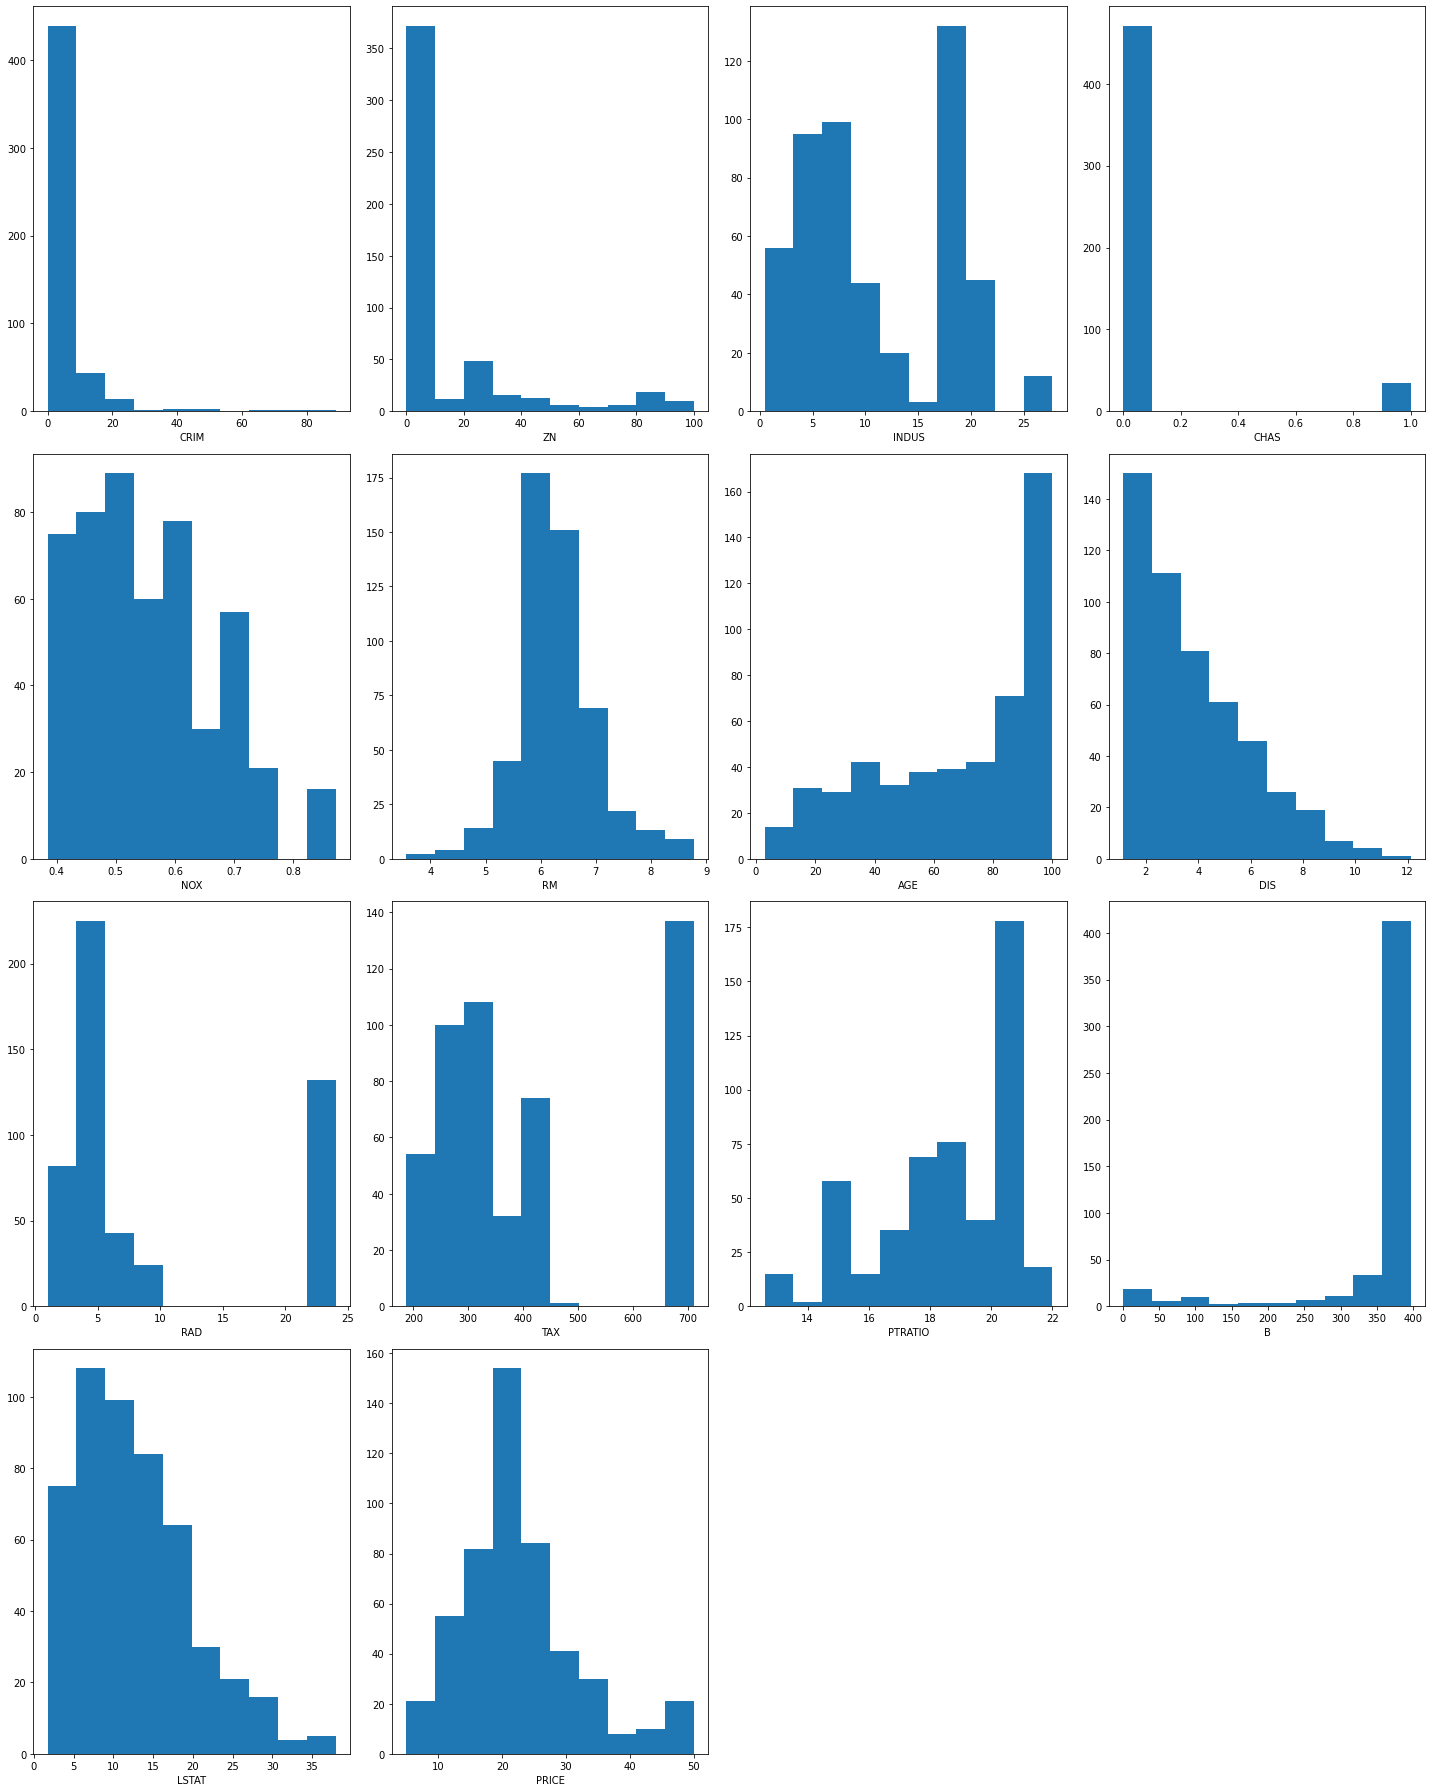

In [26]:

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        plt.hist(bos[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

In [27]:
bos['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

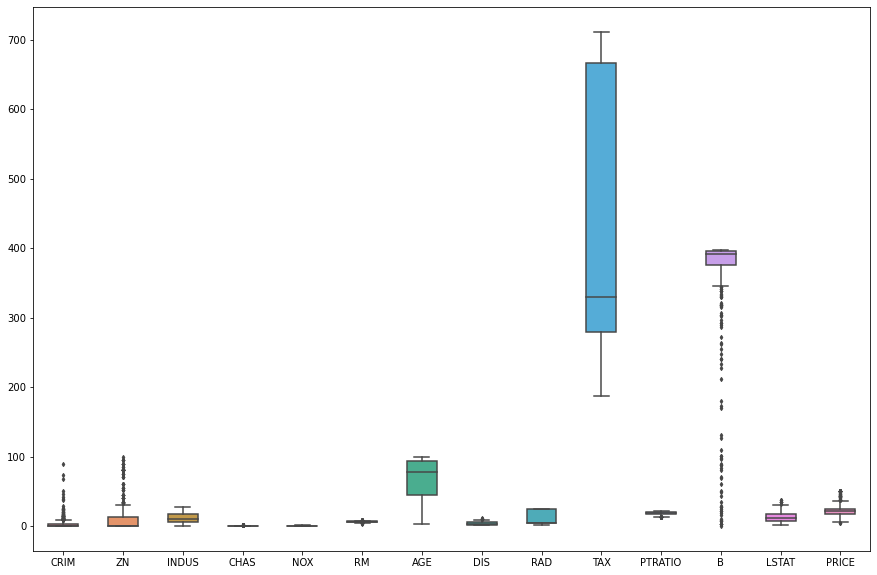

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)


In [29]:

x_multi = bos.drop(['PRICE'], axis = 1)
y_multi = bos['PRICE']

scaler = StandardScaler()
x_multi_scaled = scaler.fit_transform(x_multi)


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_multi_scaled,y_multi,test_size = 0.25,random_state=42)


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_multi_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x_multi.columns
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


### we are ignoring multicolinearity since VIF values are less than 10

In [32]:
# This creates a LinearRegression object
linreg = LinearRegression()

# Use all 13 predictors to fit linear regression model
linreg.fit(x_train,y_train)


LinearRegression()

In [33]:
# The coefficients
pd.DataFrame({'features': x_multi.columns, 'estimatedCoefficients': linreg.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-1.102682
1,ZN,0.688539
2,INDUS,0.334859
3,CHAS,0.703757
4,NOX,-1.879857
5,RM,3.066527
6,AGE,-0.260066
7,DIS,-2.946903
8,RAD,2.242175
9,TAX,-1.676456


In [34]:
r2_score_train = linreg.score(x_train,y_train)
adj_r2score_train = adj_r2(x_train,y_train,r2_score_train)

print("Train: r2_score:",round((r2_score_train*100),2))
print("Train: Adj r2_score:",round((adj_r2score_train*100),2))



Train: r2_score: 74.81
Train: Adj r2_score: 73.91


In [35]:
r2_score_test = linreg.score(x_test,y_test)
adj_r2score_test = adj_r2(x_test,y_test,r2_score_test)

print("Test: r2_score:",round((r2_score_test*100),2))
print("Test: Adj r2_score:",round((adj_r2score_test*100),2))

Test: r2_score: 68.44
Test: Adj r2_score: 64.81


## Lets try some other models

### Lasso Regularization
### LassoCV will return best alpha and coefficients after performing 10 cross validations

In [36]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [37]:
# best lasso alpha parameter
lasso_alpha = lasscv.alpha_

In [38]:
lasso_reg = Lasso(alpha=lasso_alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00035978708150203063)

### Using Ridge regression model

In [39]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

lasso_score_train = round((lasso_reg.score(x_train, y_train)*100),2)
lasso_score_test  = round((lasso_reg.score(x_test,y_test)*100),2)
print("Train  :",lasso_score_train)
print("Test   :",lasso_score_test)

Train  : 74.81
Test   : 68.44


In [40]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)
ridgecv_alpha = ridgecv.alpha_
ridge_model = Ridge(alpha=ridgecv_alpha)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.22984593633354256)

In [41]:
ridge_score_train = round((ridge_model.score(x_train, y_train)*100),2)
ridge_score_test  = round((ridge_model.score(x_test,y_test)*100),2)
print("Train  :",ridge_score_train)
print("Test   :",ridge_score_test)

Train  : 74.81
Test   : 68.44


In [42]:
models = pd.DataFrame({
    'Model': ['Single Linear Regression'
              , 'Multiple Linear Regression'
              , 'Lasso'
              , 'Ridge'],
    'Train score':[single_r2_score
                  ,round(adj_r2score_train*100,2)
                  ,lasso_score_train
                  ,ridge_score_train],
    'Test score':[single_r2_score
                 ,round(adj_r2score_test*100,2)
                 ,lasso_score_test
                 ,ridge_score_test]
})
             
models

,Model,Train score,Test score
0,Single Linear Regression,48.35,48.35
1,Multiple Linear Regression,73.91,64.81
2,Lasso,74.81,68.44
3,Ridge,74.81,68.44


### Let us try to predict few values

In [43]:
y_pred_linreg =linreg.predict(x_test)[0:5]
y_pred_lasso  = lasso_reg.predict(x_test)[0:5]
y_pred_ridge = ridge_model.predict(x_test)[0:5]

predictions = pd.DataFrame()
predictions['original'] = np.array(y_test[0:5])
predictions['linear'] = y_pred_linreg
predictions['lasso']= y_pred_lasso
predictions['ridge'] = y_pred_ridge
predictions

,original,linear,lasso,ridge
0,23.6,28.838854,28.839146,28.833323
1,32.4,36.007833,36.002891,35.996267
2,13.6,15.083248,15.091418,15.110866
3,22.8,25.230909,25.228934,25.228481
4,16.1,18.878641,18.877759,18.876588


In [44]:
import pickle
# Writing different model files to file
with open( 'LinearRegression.pkl', 'wb') as f:
    pickle.dump(linreg,f)
    
with open('StandardScalar.pkl', 'wb') as f:
    pickle.dump(scaler,f)

In [45]:

filename1 = 'LinearRegression.pkl'
filename2 = 'StandardScalar.pkl'
loaded_model1 = pickle.load(open(filename1, 'rb')) 
loaded_model2 = pickle.load(open(filename2, 'rb')) 
prediction=loaded_model1.predict(loaded_model2.transform([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]])) 
print(prediction[0])


29.97813037271505


In [46]:
prediction=loaded_model1.predict(loaded_model2.transform([[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14]])) 
print(prediction[0])

25.102614999719147
